<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Rascunho_de_c%C3%B3digo_UFU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=a165e9d912960aaabe5755de109e2a073d967f9035f79a341b2805e2653c88c5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Importando dados

In [ ]:
ativos = [ 'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'WEGE3.SA', 'EMBR3.SA', 'CIEL3.SA', 'CVCB3.SA', 'OIBR3.SA', 'KNRI11.SA', 'SMAL11.SA']

In [ ]:
inicio = '2011-01-01'
fim = '2021-08-17'

In [ ]:
df = pd.DataFrame()

In [ ]:
df

""


In [ ]:
dolar = yf.download('BRL=X', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.6096,1.6593,1.6096,1.6155,1.6155,0
2011-01-04,1.5979,1.6666,1.5979,1.6465,1.6465,0
2011-01-05,1.6121,1.6687,1.6121,1.6675,1.6675,0
2011-01-06,1.6234,1.6903,1.6234,1.6750,1.6750,0
2011-01-07,1.6367,1.6869,1.6367,1.6859,1.6859,0


In [ ]:
for i in ativos:
  df[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA
Date,,,,,,,,,,
2011-01-03,19.787767,35.375000,11.561629,2.600879,10.755540,4.514042,NaN,84.685883,NaN,71.470001
2011-01-04,19.714478,36.107708,11.654867,2.555914,10.963425,4.407828,NaN,85.905190,NaN,70.940002
2011-01-05,19.949005,36.759689,11.829693,2.521598,11.017653,4.381275,NaN,87.512444,NaN,70.919998
2011-01-06,19.868387,36.287762,11.549977,2.494382,11.071881,4.348083,NaN,87.678711,NaN,70.129997
2011-01-07,19.589890,36.014553,11.267344,2.497933,10.972459,4.311574,NaN,88.232933,NaN,69.809998


In [ ]:
precos = df

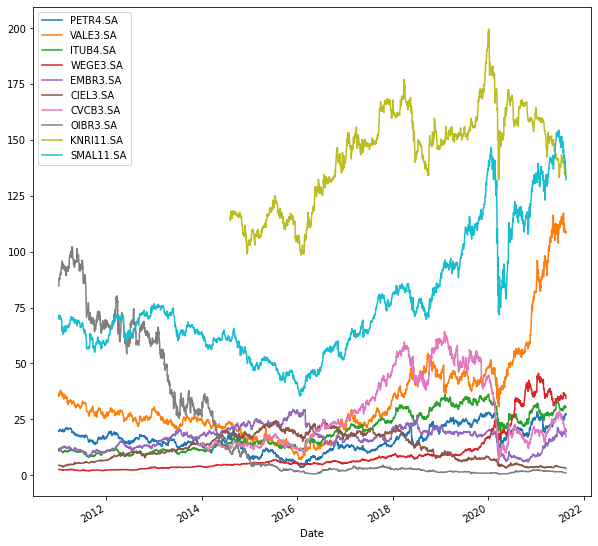

In [ ]:
precos.plot(figsize = (10,10));

In [ ]:
precos.iloc[0]

PETR4.SA     19.787767
VALE3.SA     35.375000
ITUB4.SA     11.561629
WEGE3.SA      2.600879
EMBR3.SA     10.755540
CIEL3.SA      4.514042
CVCB3.SA           NaN
OIBR3.SA     84.685883
KNRI11.SA          NaN
SMAL11.SA    71.470001
Name: 2011-01-03 00:00:00, dtype: float64

In [ ]:
normalizado = precos/precos.iloc[0]

In [ ]:
normalizado.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA
Date,,,,,,,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000
2011-01-04,0.996296,1.020713,1.008064,0.982712,1.019328,0.976470,NaN,1.014398,NaN,0.992584
2011-01-05,1.008148,1.039143,1.023186,0.969518,1.024370,0.970588,NaN,1.033377,NaN,0.992304
2011-01-06,1.004074,1.025802,0.998992,0.959054,1.029412,0.963235,NaN,1.035340,NaN,0.981251
2011-01-07,0.990000,1.018079,0.974546,0.960419,1.020168,0.955147,NaN,1.041885,NaN,0.976773


In [ ]:
normalizado.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA
Date,,,,,,,,,,
2021-08-10,1.348830,3.111237,2.638619,13.876080,1.822317,0.739913,NaN,0.013462,NaN,1.963761
2021-08-11,1.367431,3.088904,2.667927,13.899149,1.852999,0.735483,NaN,0.013107,NaN,1.953267
2021-08-12,1.387940,3.086926,2.617931,13.653077,1.801862,0.719976,NaN,0.012871,NaN,1.922765
2021-08-13,1.399864,3.061484,2.653273,13.753044,1.932957,0.700038,NaN,0.012753,NaN,1.920386
2021-08-16,1.366000,3.075618,2.624198,13.230144,1.808370,0.664593,NaN,0.011926,NaN,1.849727


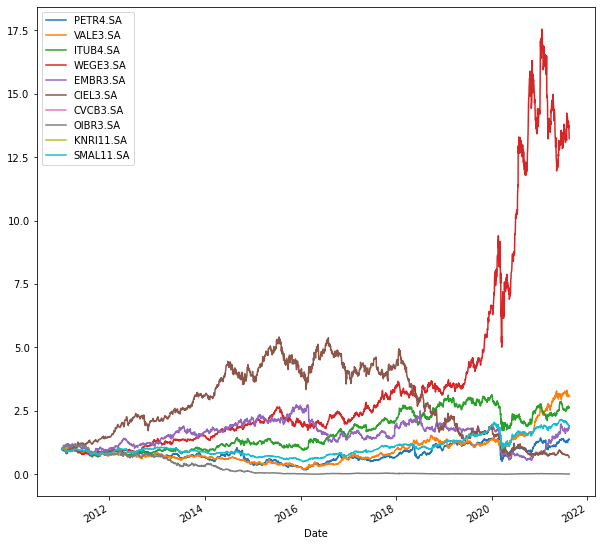

In [ ]:
normalizado.plot(figsize = (10,10));

# 3. Cálculo dos retornos

In [ ]:
ativos_retornos = precos.pct_change()

In [ ]:
ativos_retornos.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,ETH-USD,AMZN
Date,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.039087,0.016838,-0.006473,0.061378,0.023895,-0.023077,0.002975,0.055319,-0.005415,-0.002239,0.057461,0.010004
2021-01-06,0.001997,0.032796,0.029316,0.026515,0.038506,-0.023622,0.007415,-0.016129,0.000375,-0.019746,0.097369,-0.024897
2021-01-07,0.029900,0.065278,0.038924,0.041328,-0.002247,0.008065,-0.040236,0.008197,0.000563,-0.000839,0.015380,0.007577
2021-01-08,0.003871,-0.003127,-0.000305,0.060477,-0.007883,0.021333,-0.002556,-0.012195,-0.002501,0.012066,-0.001208,0.006496


In [ ]:
ativos_retornos = ativos_retornos.dropna()

In [ ]:
ativos_retornos[ativos_retornos['PETR4.SA']<-0.03]

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,ETH-USD,AMZN
Date,,,,,,,,,,,,
2021-01-13,-0.048319,-0.029943,-0.016470,0.002331,-0.009688,0.015707,-0.016802,-0.008163,-0.000376,-0.000440,0.083671,0.014438
2021-01-15,-0.045161,-0.043456,-0.037742,-0.041282,-0.046092,-0.027990,-0.025528,-0.012000,0.000500,-0.021295,-0.038260,-0.007425
2021-01-29,-0.038545,-0.034577,-0.035726,-0.047516,-0.037240,-0.004842,-0.010395,-0.009524,0.002321,-0.031297,0.065034,-0.009705
2021-02-19,-0.066279,0.003799,-0.010391,-0.001679,0.028319,-0.005571,-0.018947,0.010000,0.002393,0.004431,0.011724,-0.023535
2021-02-22,-0.207098,-0.024752,-0.072773,-0.006247,0.074010,0.047619,-0.049893,-0.074257,-0.006533,-0.029412,-0.090896,-0.021281
2021-02-25,-0.049590,-0.022669,-0.031285,-0.077278,-0.063359,-0.059585,-0.051791,-0.046154,-0.001581,-0.026420,-0.092754,-0.032400
2021-02-26,-0.040966,-0.012433,-0.012103,-0.024375,-0.003260,-0.008265,-0.039512,0.010753,0.002470,-0.025220,-0.020106,0.011700
2021-03-03,-0.036380,-0.012303,0.002328,-0.000779,0.000805,0.011905,-0.045252,-0.016760,-0.003531,-0.001490,0.055771,-0.028932
2021-03-08,-0.057615,-0.005389,-0.031850,-0.053258,-0.046022,-0.058823,-0.072393,-0.100503,0.001558,-0.066859,0.196607,-0.016168


In [ ]:
ativos_retornos.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,ETH-USD,AMZN
Date,,,,,,,,,,,,
2021-01-05,0.039087,0.016838,-0.006473,0.061378,0.023895,-0.023077,0.002975,0.055319,-0.005415,-0.002239,0.057461,0.010004
2021-01-06,0.001997,0.032796,0.029316,0.026515,0.038506,-0.023622,0.007415,-0.016129,0.000375,-0.019746,0.097369,-0.024897
2021-01-07,0.029900,0.065278,0.038924,0.041328,-0.002247,0.008065,-0.040236,0.008197,0.000563,-0.000839,0.015380,0.007577
2021-01-08,0.003871,-0.003127,-0.000305,0.060477,-0.007883,0.021333,-0.002556,-0.012195,-0.002501,0.012066,-0.001208,0.006496
2021-01-11,-0.008355,-0.000196,-0.022547,-0.030630,-0.022702,-0.028721,-0.022040,-0.041152,0.001567,0.006565,-0.109502,-0.021519


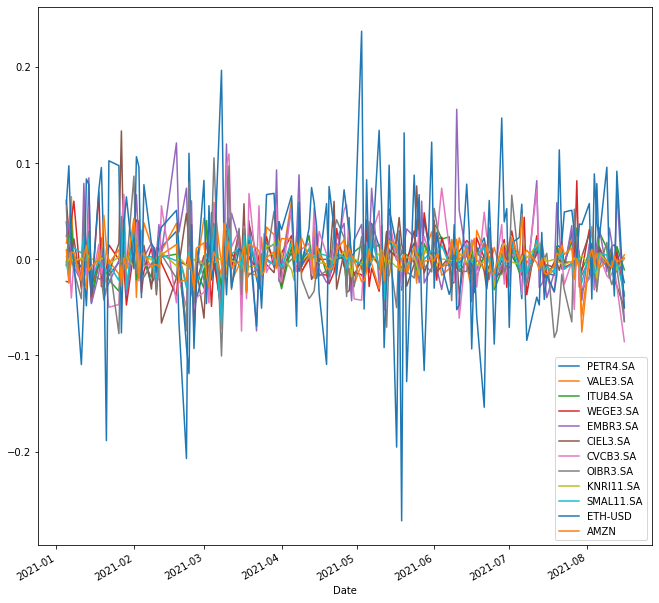

In [ ]:
ativos_retornos.plot(figsize = (11,11))

# 4. Visualização de janelas de volatilidade

In [ ]:
vol_movel = ativos_retornos.rolling(window = 20).std()

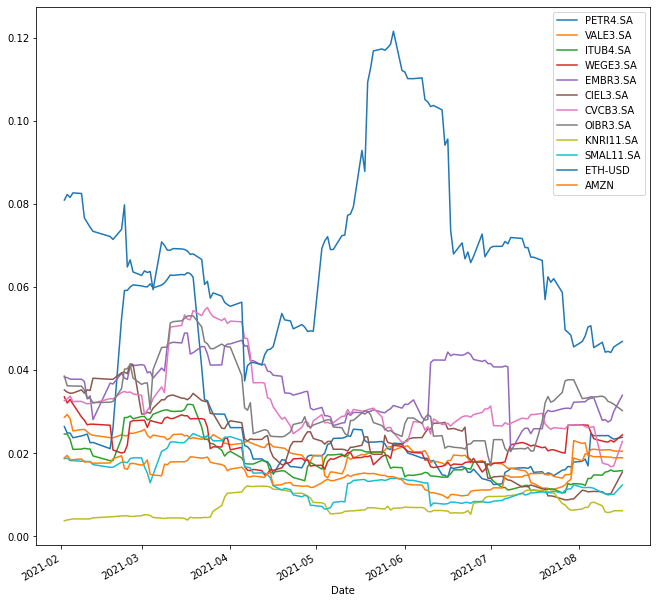

In [ ]:
vol_movel.plot(figsize = (11,11))

# 5. Criar um DF consolidade com retorno vs. volatilidade

In [ ]:
ativos_retornos.std()

PETR4.SA     0.029660
VALE3.SA     0.020885
ITUB4.SA     0.019502
WEGE3.SA     0.023550
EMBR3.SA     0.036624
CIEL3.SA     0.024719
CVCB3.SA     0.033298
OIBR3.SA     0.032237
KNRI11.SA    0.007370
SMAL11.SA    0.014583
ETH-USD      0.071398
AMZN         0.015623
dtype: float64

In [ ]:
volatilidade = pd.DataFrame(ativos_retornos.std(), columns = ['Vol'])

In [ ]:
volatilidade

,Vol
PETR4.SA,0.029660
VALE3.SA,0.020885
ITUB4.SA,0.019502
WEGE3.SA,0.023550
EMBR3.SA,0.036624
CIEL3.SA,0.024719
CVCB3.SA,0.033298
OIBR3.SA,0.032237
KNRI11.SA,0.007370
SMAL11.SA,0.014583


In [ ]:
ativos_retornos.mean()

PETR4.SA     0.000613
VALE3.SA     0.001777
ITUB4.SA     0.000200
WEGE3.SA    -0.000192
EMBR3.SA     0.006210
CIEL3.SA    -0.001311
CVCB3.SA    -0.000502
OIBR3.SA    -0.005025
KNRI11.SA   -0.001188
SMAL11.SA    0.000017
ETH-USD      0.009921
AMZN         0.000350
dtype: float64

In [ ]:
retornos_medios = pd.DataFrame(ativos_retornos.mean(), columns = ['Retorno'])

In [ ]:
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)

In [ ]:
risco_retorno

,Retorno,Vol
PETR4.SA,0.000613,0.029660
VALE3.SA,0.001777,0.020885
ITUB4.SA,0.000200,0.019502
WEGE3.SA,-0.000192,0.023550
EMBR3.SA,0.006210,0.036624
CIEL3.SA,-0.001311,0.024719
CVCB3.SA,-0.000502,0.033298
OIBR3.SA,-0.005025,0.032237
KNRI11.SA,-0.001188,0.007370
SMAL11.SA,0.000017,0.014583


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

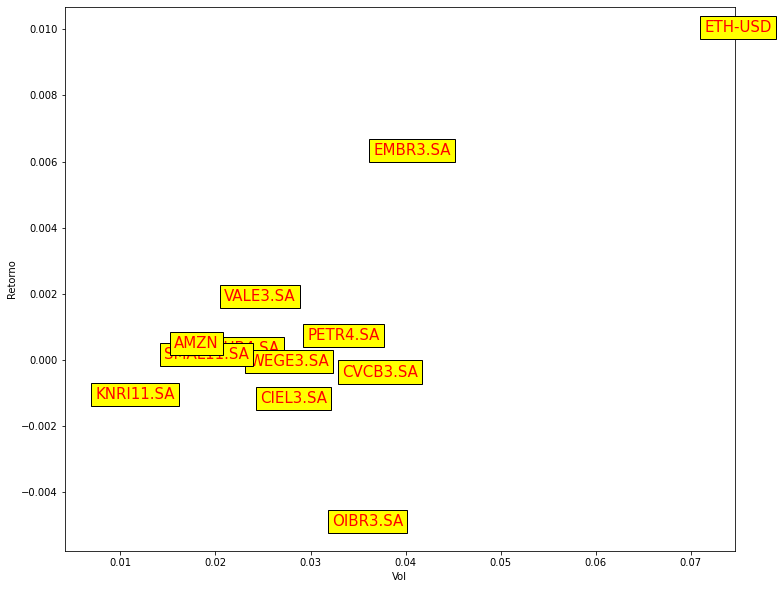

In [ ]:
plt.subplots(figsize = (12,10))

sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Retorno')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Retorno[i], s = risco_retorno.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))

### Sem Ethereum

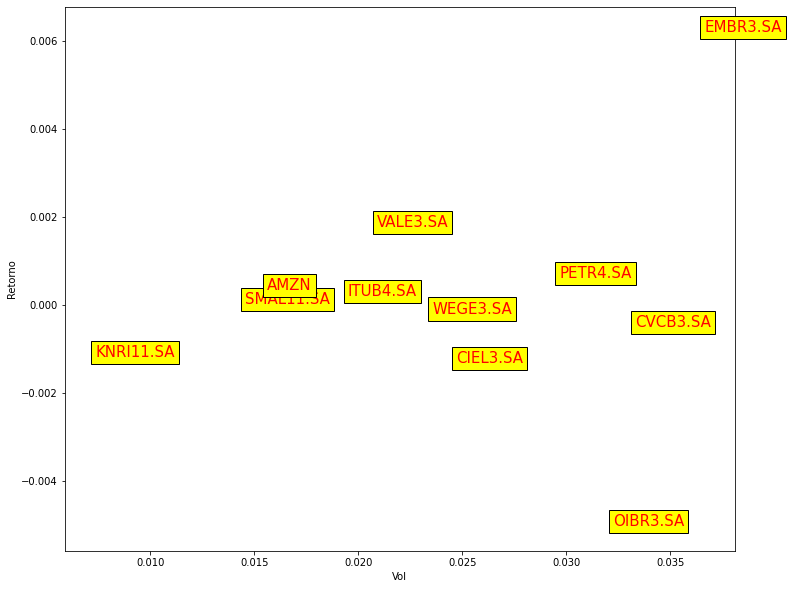

In [ ]:
plt.subplots(figsize = (12,10))

data = risco_retorno.drop(['ETH-USD'])

sns.scatterplot(data = data, x = 'Vol', y = 'Retorno')

for i in range(data.shape[0]):
  plt.text(x = data.Vol[i], y = data.Retorno[i], s = data.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))

# 6. Simulação de carteira vs. IBOV

In [ ]:
precos.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA
Date,,,,,,,,,,
2011-01-03,19.787767,35.375000,11.561629,2.600879,10.755540,4.514042,NaN,84.685883,NaN,71.470001
2011-01-04,19.714478,36.107708,11.654867,2.555914,10.963425,4.407828,NaN,85.905190,NaN,70.940002
2011-01-05,19.949005,36.759689,11.829693,2.521598,11.017653,4.381275,NaN,87.512444,NaN,70.919998
2011-01-06,19.868387,36.287762,11.549977,2.494382,11.071881,4.348083,NaN,87.678711,NaN,70.129997
2011-01-07,19.589890,36.014553,11.267344,2.497933,10.972459,4.311574,NaN,88.232933,NaN,69.809998


In [ ]:
precos.iloc[0]

PETR4.SA     19.787767
VALE3.SA     35.375000
ITUB4.SA     11.561629
WEGE3.SA      2.600879
EMBR3.SA     10.755540
CIEL3.SA      4.514042
CVCB3.SA           NaN
OIBR3.SA     84.685883
KNRI11.SA          NaN
SMAL11.SA    71.470001
Name: 2011-01-03 00:00:00, dtype: float64

In [ ]:
comprados = round(1000/precos.iloc[0], 0)

In [ ]:
type(comprados)

pandas.core.series.Series

In [ ]:
comprados

PETR4.SA      51.0
VALE3.SA      28.0
ITUB4.SA      86.0
WEGE3.SA     384.0
EMBR3.SA      93.0
CIEL3.SA     222.0
CVCB3.SA       NaN
OIBR3.SA      12.0
KNRI11.SA      NaN
SMAL11.SA     14.0
Name: 2011-01-03 00:00:00, dtype: float64

In [ ]:
PL = precos*comprados

In [ ]:
PL.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA
Date,,,,,,,,,,
2011-01-03,1009.176138,990.500000,994.300119,998.737427,1000.265210,1002.117408,NaN,1016.230591,NaN,1000.580017
2011-01-04,1005.438354,1011.015823,1002.318577,981.470856,1019.598495,978.537889,NaN,1030.862274,NaN,993.160034
2011-01-05,1017.399261,1029.271301,1017.353584,968.293488,1024.641684,972.643089,NaN,1050.149323,NaN,992.879974
2011-01-06,1013.287748,1016.057327,993.298048,957.842834,1029.684960,965.274536,NaN,1052.144531,NaN,981.819962
2011-01-07,999.084366,1008.407486,968.991543,959.206146,1020.438672,957.169424,NaN,1058.795197,NaN,977.339966


In [ ]:
PL.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA
Date,,,,,,,,,,
2021-08-10,1361.206661,3081.679932,2623.579197,13858.560059,1822.800035,741.479981,NaN,13.680000,NaN,1964.900085
2021-08-11,1379.978554,3059.559906,2652.720463,13881.600586,1853.490028,737.039985,NaN,13.320000,NaN,1954.400085
2021-08-12,1400.675903,3057.599915,2603.008766,13635.839355,1802.339922,721.500000,NaN,13.080000,NaN,1923.879974
2021-08-13,1412.709183,3032.400085,2638.149830,13735.680176,1933.470085,701.520019,NaN,12.960001,NaN,1921.500000
2021-08-16,1378.534510,3046.400085,2609.240013,13213.439941,1808.850071,666.000000,NaN,12.120000,NaN,1850.799957


In [ ]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)

In [ ]:
PL.head()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,PL Total
Date,,,,,,,,,,,
2011-01-03,1009.176138,990.500000,994.300119,998.737427,1000.265210,1002.117408,NaN,1016.230591,NaN,1000.580017,8011.906910
2011-01-04,1005.438354,1011.015823,1002.318577,981.470856,1019.598495,978.537889,NaN,1030.862274,NaN,993.160034,8022.402304
2011-01-05,1017.399261,1029.271301,1017.353584,968.293488,1024.641684,972.643089,NaN,1050.149323,NaN,992.879974,8072.631704
2011-01-06,1013.287748,1016.057327,993.298048,957.842834,1029.684960,965.274536,NaN,1052.144531,NaN,981.819962,8009.409947
2011-01-07,999.084366,1008.407486,968.991543,959.206146,1020.438672,957.169424,NaN,1058.795197,NaN,977.339966,7949.432799


In [ ]:
PL.tail()

,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,PL Total
Date,,,,,,,,,,,
2021-08-10,1361.206661,3081.679932,2623.579197,13858.560059,1822.800035,741.479981,NaN,13.680000,NaN,1964.900085,25467.885950
2021-08-11,1379.978554,3059.559906,2652.720463,13881.600586,1853.490028,737.039985,NaN,13.320000,NaN,1954.400085,25532.109608
2021-08-12,1400.675903,3057.599915,2603.008766,13635.839355,1802.339922,721.500000,NaN,13.080000,NaN,1923.879974,25157.923836
2021-08-13,1412.709183,3032.400085,2638.149830,13735.680176,1933.470085,701.520019,NaN,12.960001,NaN,1921.500000,25388.389379
2021-08-16,1378.534510,3046.400085,2609.240013,13213.439941,1808.850071,666.000000,NaN,12.120000,NaN,1850.799957,24585.384578


In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,69310.0,70471.0,69305.0,69962.0,69962.0,1862400
2011-01-04,69962.0,70318.0,69560.0,70318.0,70318.0,2427200
2011-01-05,70311.0,71173.0,69802.0,71091.0,71091.0,2309200
2011-01-06,71093.0,71167.0,70469.0,70579.0,70579.0,2546000
2011-01-07,70580.0,70783.0,69718.0,70057.0,70057.0,1761000


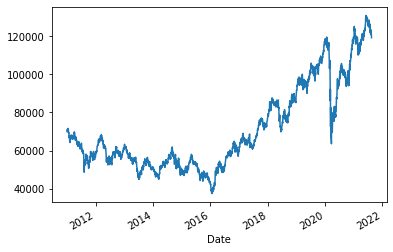

In [ ]:
ibov['Adj Close'].plot()

In [ ]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov.head()

,Open,High,Low,Close,IBOV,Volume
Date,,,,,,
2011-01-03,69310.0,70471.0,69305.0,69962.0,69962.0,1862400
2011-01-04,69962.0,70318.0,69560.0,70318.0,70318.0,2427200
2011-01-05,70311.0,71173.0,69802.0,71091.0,71091.0,2309200
2011-01-06,71093.0,71167.0,70469.0,70579.0,70579.0,2546000
2011-01-07,70580.0,70783.0,69718.0,70057.0,70057.0,1761000


In [ ]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

In [ ]:
ibov

,IBOV
Date,
2011-01-03,69962.0
2011-01-04,70318.0
2011-01-05,71091.0
2011-01-06,70579.0
2011-01-07,70057.0
...,...
2021-08-10,122202.0
2021-08-11,122056.0
2021-08-12,120701.0


In [ ]:
ibov.index = pd.to_datetime(ibov.index)
PL.index = pd.to_datetime(PL.index)

In [ ]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,IBOV,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,PL Total
Date,,,,,,,,,,,,
2011-01-03,69962.0,1009.176138,990.500000,994.300119,998.737427,1000.265210,1002.117408,NaN,1016.230591,NaN,1000.580017,8011.906910
2011-01-04,70318.0,1005.438354,1011.015823,1002.318577,981.470856,1019.598495,978.537889,NaN,1030.862274,NaN,993.160034,8022.402304
2011-01-05,71091.0,1017.399261,1029.271301,1017.353584,968.293488,1024.641684,972.643089,NaN,1050.149323,NaN,992.879974,8072.631704
2011-01-06,70579.0,1013.287748,1016.057327,993.298048,957.842834,1029.684960,965.274536,NaN,1052.144531,NaN,981.819962,8009.409947
2011-01-07,70057.0,999.084366,1008.407486,968.991543,959.206146,1020.438672,957.169424,NaN,1058.795197,NaN,977.339966,7949.432799


In [ ]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [ ]:
PL_normalizado.head()

,IBOV,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,PL Total
Date,,,,,,,,,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000
2011-01-04,1.005088,0.996296,1.020713,1.008064,0.982712,1.019328,0.976470,NaN,1.014398,NaN,0.992584,1.001310
2011-01-05,1.016137,1.008148,1.039143,1.023186,0.969518,1.024370,0.970588,NaN,1.033377,NaN,0.992304,1.007579
2011-01-06,1.008819,1.004074,1.025802,0.998992,0.959054,1.029412,0.963235,NaN,1.035340,NaN,0.981251,0.999688
2011-01-07,1.001358,0.990000,1.018079,0.974546,0.960419,1.020168,0.955147,NaN,1.041885,NaN,0.976773,0.992202


In [ ]:
PL_normalizado.tail()

,IBOV,PETR4.SA,VALE3.SA,ITUB4.SA,WEGE3.SA,EMBR3.SA,CIEL3.SA,CVCB3.SA,OIBR3.SA,KNRI11.SA,SMAL11.SA,PL Total
Date,,,,,,,,,,,,
2021-08-10,1.746691,1.348830,3.111237,2.638619,13.876080,1.822317,0.739913,NaN,0.013462,NaN,1.963761,3.178755
2021-08-11,1.744604,1.367431,3.088904,2.667927,13.899149,1.852999,0.735483,NaN,0.013107,NaN,1.953267,3.186771
2021-08-12,1.725237,1.387940,3.086926,2.617931,13.653077,1.801862,0.719976,NaN,0.012871,NaN,1.922765,3.140067
2021-08-13,1.732283,1.399864,3.061484,2.653273,13.753044,1.932957,0.700038,NaN,0.012753,NaN,1.920386,3.168832
2021-08-16,1.703496,1.366000,3.075618,2.624198,13.230144,1.808370,0.664593,NaN,0.011926,NaN,1.849727,3.068606


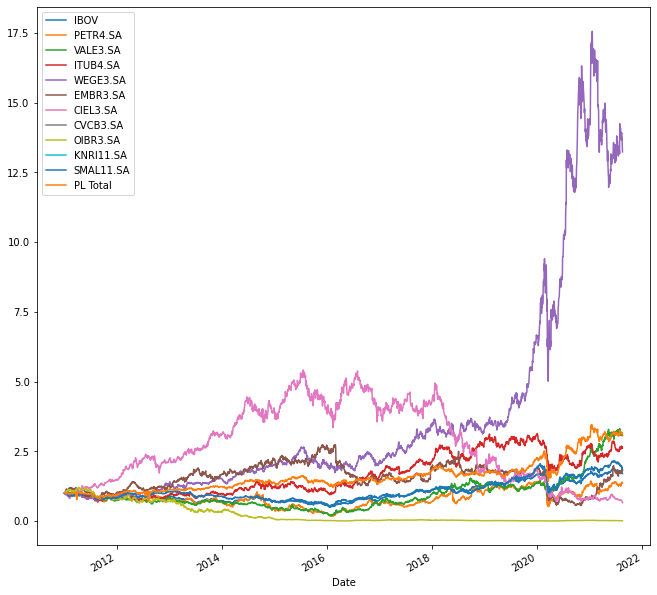

In [ ]:
PL_normalizado.plot(figsize = (11,11));

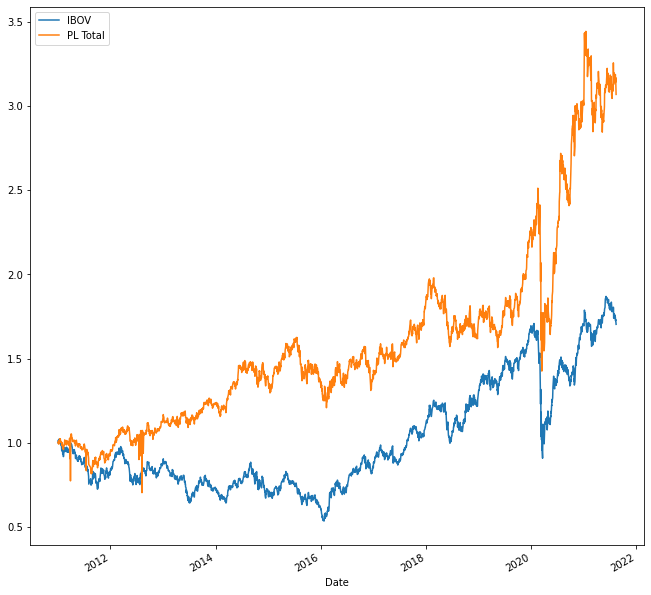

In [ ]:
PL_normalizado[[ 'IBOV', 'PL Total' ]].plot(figsize = (11,11));